In [ ]:
pip install folium

Location-based Analysis

Objective: Perform a geographical analysis of the restaurants in the dataset.

Steps: 
Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map. Group the restaurants by city or locality and analyze the concentration of restaurants in different areas. Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality. Identify any interesting insights or patterns related to the locations of the restaurants.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

'''
- pandas for data handling,
- matplotlib and seaborn for visualizations,
- folium for interactive maps.
'''

'\n- pandas for data handling,\n- matplotlib and seaborn for visualizations,\n- folium for interactive maps.\n'

In [39]:
# Step 2: Load the dataset
df = pd.read_csv('Dataset .csv')

In [40]:
# Step 3: Preview the relevant columns
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [41]:
print(df.columns.tolist())


['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [42]:
# Step 3: Preview the relevant columns

df.columns = df.columns.str.strip() #-- Strip spaces from all column names

df.columns = df.columns.str.lower() #-- Convert all column names to lowercase (for uniformity)

print(df[['restaurant name','latitude', 'longitude', 'city']].head())

          restaurant name   latitude   longitude              city
0        Le Petit Souffle  14.565443  121.027535       Makati City
1        Izakaya Kikufuji  14.553708  121.014101       Makati City
2  Heat - Edsa Shangri-La  14.581404  121.056831  Mandaluyong City
3                    Ooma  14.585318  121.056475  Mandaluyong City
4             Sambo Kojin  14.584450  121.057508  Mandaluyong City


In [43]:
# Step 4: Create an interactive map of restaurant locations
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['restaurant name']} ({row['city']})"
    ).add_to(m)

# Save map as HTML
m.save('restaurant_map.html')

In [44]:
print(df['rating text'].unique())

['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


In [45]:
rating_map = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1
}

In [47]:
df['rating_encoded'] = df['rating text'].map(rating_map)

In [49]:
df['rating_encoded'] = df['rating_encoded'].fillna(0)

In [48]:
df.head()

restaurant id         restaurant name  country code              city  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    locality verbose   longitude   latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           cuisines  ...  has table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  has online delivery is delivering now switch to order menu price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  aggregate rating  rating color  rating text votes rating_encoded  
0              4.8    Dark Green    Excellent   314            5.0  
1              4.5    Dark Green    Excellent   591            5.0  
2              4.4         Green    Very Good   270            4.0  
3              4.9    Dark Green    Excellent   365            5.0  
4              4.8    Dark Green    Excellent   229            5.0  

[5 rows x 22 columns]

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating text'])

In [53]:
# Step 5: Group and summarize by city

city_stats = df.groupby('city').agg({
    'restaurant name': 'count',
    'rating_encoded': 'mean',
    'price range': 'mean'
}).reset_index()

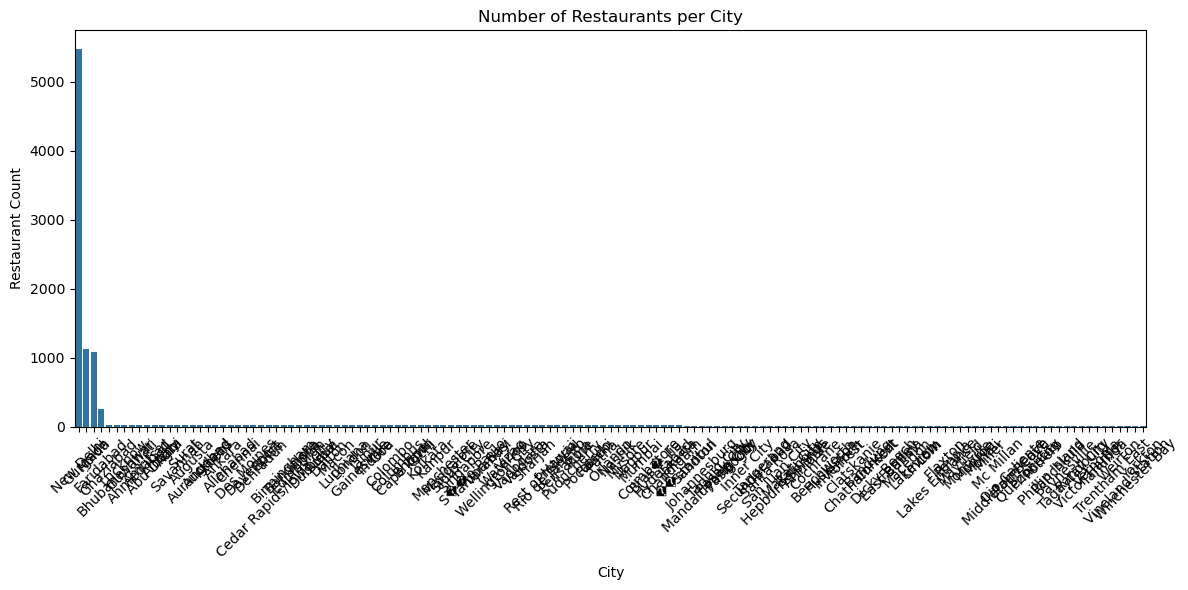

In [54]:
# Step 6: Visualize number of restaurants per city
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='restaurant name', data=city_stats.sort_values('restaurant name', ascending=False))
plt.xticks(rotation=45)
plt.title("Number of Restaurants per City")
plt.ylabel("Restaurant Count")
plt.xlabel("City")
plt.tight_layout()
plt.show()

In [ ]:
# Step 7: Explore popular cuisines per city
cuisine_data = df.groupby(['city', 'cuisines']).size().unstack().fillna(0)

# Display top 5 cities for preview
print(cuisine_data.head())

In [55]:
# Step 8: Identify cities with highest-rated restaurants
top_rated = df[df['rating_encoded'] >= 4.0]
top_rated_city_counts = top_rated['city'].value_counts()

print("Cities with many top-rated restaurants:")
print(top_rated_city_counts)

Cities with many top-rated restaurants:
city
New Delhi          397
Gurgaon            117
Noida               72
Wellington City     16
Boise               16
                  ... 
Ranchi               1
Secunderabad         1
Panchkula            1
Varanasi             1
Randburg             1
Name: count, Length: 99, dtype: int64
